In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [12]:
df=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
578,female,group B,some college,free/reduced,completed,48,56,58
113,female,group D,some college,standard,none,51,58,54
358,male,group D,some college,free/reduced,none,59,62,61
180,male,group C,master's degree,free/reduced,completed,62,68,75
2,female,group B,master's degree,standard,none,90,95,93


In [15]:
df.isnull().count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

In [17]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
491,female,group C,associate's degree,standard,none,64,64,70
604,male,group D,master's degree,free/reduced,completed,84,89,90
387,female,group C,associate's degree,free/reduced,none,57,78,67
618,male,group D,master's degree,standard,none,95,81,84
934,male,group C,associate's degree,standard,completed,98,87,90


<Axes: xlabel='parental level of education', ylabel='count'>

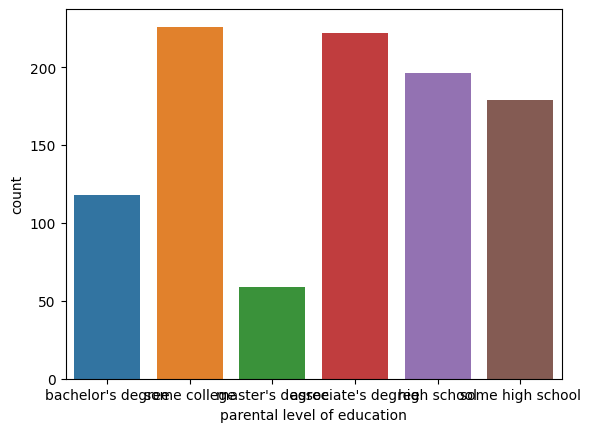

In [20]:
sns.countplot(df,x="parental level of education")

<Axes: xlabel='race/ethnicity', ylabel='count'>

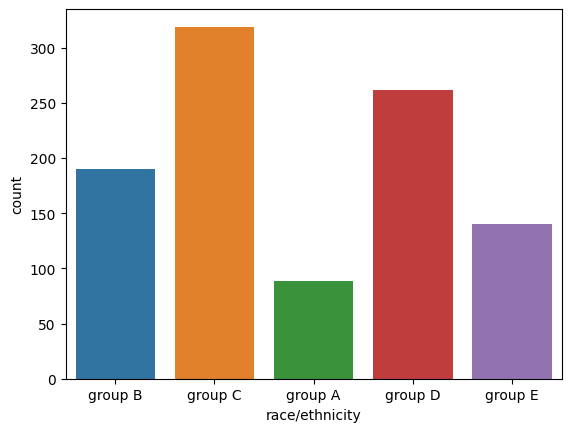

In [21]:
sns.countplot(df,x="race/ethnicity")

<Axes: xlabel='test preparation course', ylabel='count'>

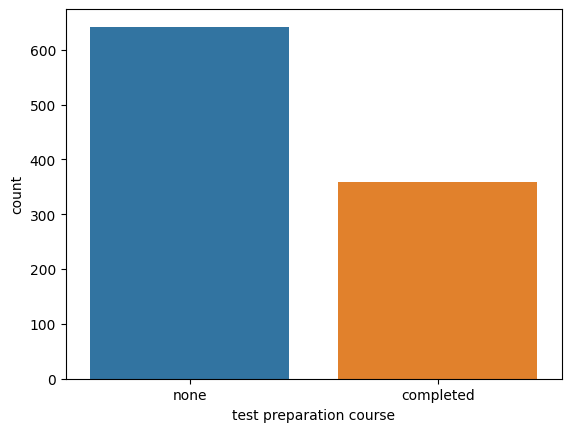

In [22]:
sns.countplot(df,x="test preparation course")

<Axes: ylabel='count'>

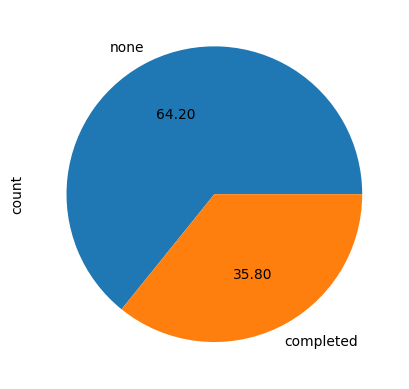

In [25]:
df['test preparation course'].value_counts().plot(kind='pie',autopct='%0.2f')

<Axes: xlabel='gender', ylabel='count'>

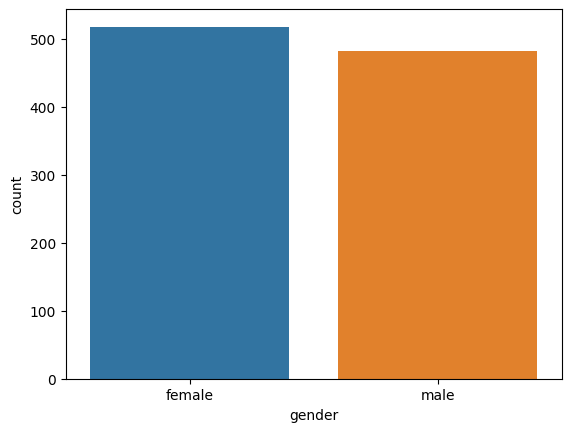

In [27]:
sns.countplot(df,x="gender")

> **Numerical Analysis**

In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


(array([  1.,   1.,   2.,   4.,  12.,  20.,  56., 107., 120., 184., 173.,
        127.,  98.,  64.,  31.]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ]),
 <BarContainer object of 15 artists>)

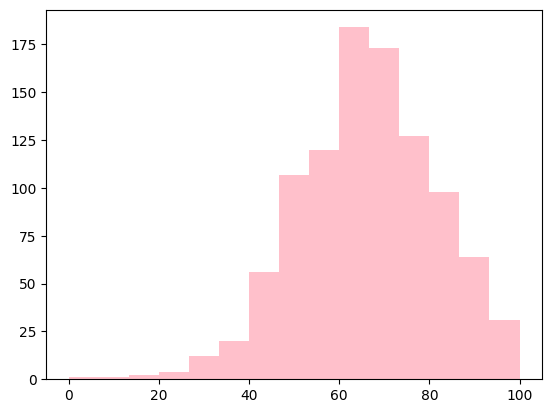

In [47]:
plt.hist(df['math score'],bins=15,color='pink')

/tmp/ipykernel_24/2354272343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='math score', ylabel='Density'>

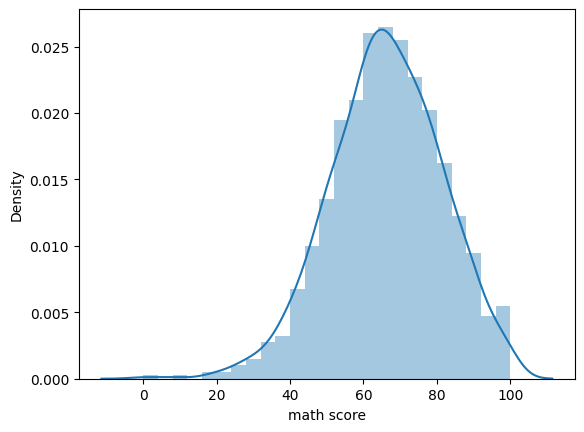

In [31]:
sns.distplot(df['math score'])

In [32]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
165,female,group C,bachelor's degree,standard,completed,96,100,100
304,female,group C,associate's degree,standard,completed,74,75,83
423,female,group A,some high school,standard,completed,59,85,80
484,female,group B,associate's degree,standard,none,49,52,54
323,female,group C,some high school,free/reduced,none,43,53,53


(array([  2.,   6.,  14.,  55., 126., 161., 223., 225., 120.,  68.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

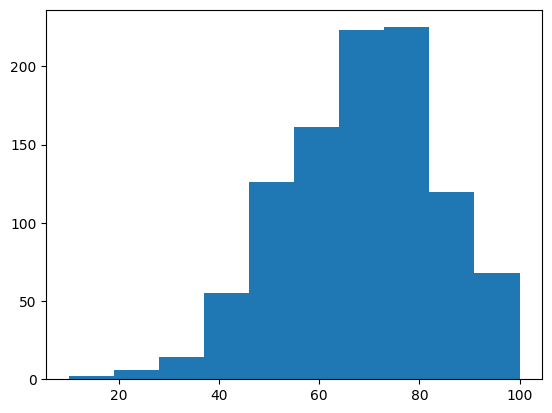

In [33]:
plt.hist(df['writing score'])

/tmp/ipykernel_24/668233639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['writing score'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='writing score', ylabel='Density'>

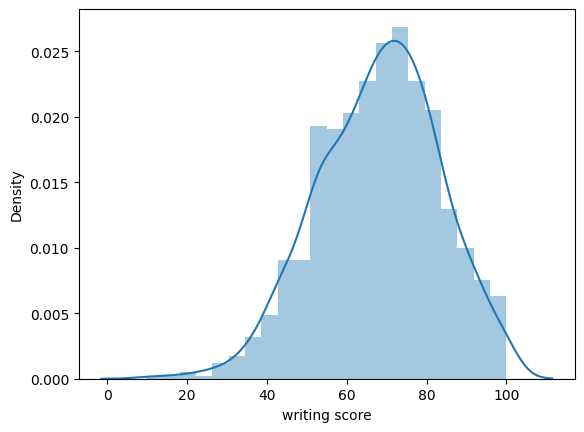

In [35]:
sns.distplot(df['writing score'])

<Axes: >

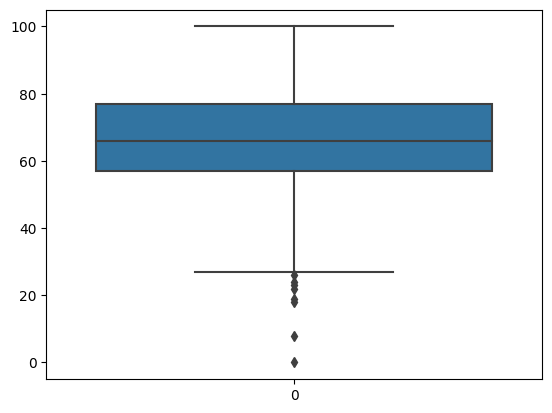

In [36]:
sns.boxplot(df['math score'])

<Axes: >

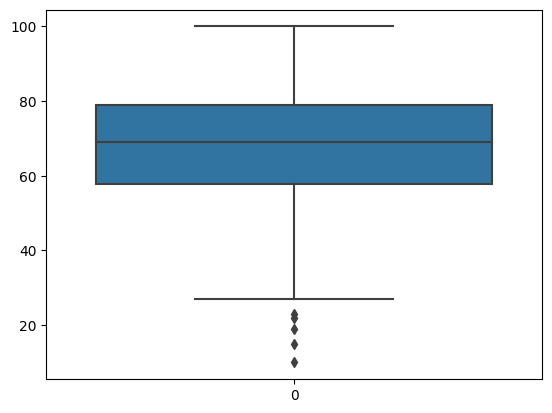

In [37]:
sns.boxplot(df['writing score'])

In [38]:
df['math score'].min()

0

In [39]:
df['math score'].max()

100

In [40]:
df['math score'].mean()

66.089

In [41]:
df['math score'].median()

66.0

In [42]:
df['math score'].skew()

-0.27893514909431694